In [51]:
import numpy as np
import matplotlib.pyplot as plt
import pandas  as pd

pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)
pd.set_option('display.width',1000)

import seaborn as sns

In [52]:
df= pd.read_csv('../data/processed/unique.csv')

In [53]:
df.head()

,index,Brand,Mobile Name,Front Camera (in MP),Primary Camera (in MP),Memory,RAM,Processor Performance,Battery Power(in mAh),Screen Height,Screen Width,Ratings,Price,Mobile Category,Price Range,Cluster
0,0,Apple,iPhone 14 Pro Max,32,200,1024,24,5.0,1074.0,2520,1080,4.0,119405.30,Flagship,130000-140000,2
1,1,Apple,iPhone 14 Pro Max,32,200,512,24,5.0,1074.0,2520,1080,4.9,113962.24,Flagship,110000-120000,2
2,2,Apple,iPhone 14 Pro,32,200,512,24,5.0,1086.0,2460,1080,3.4,222232.56,Flagship,220000-230000,2
3,4,Apple,iPhone 14 Pro Max,32,200,1024,16,5.0,1074.0,2520,1080,4.2,219022.20,Flagship,210000-220000,2
4,6,Apple,iPhone 12 Pro,32,108,1024,16,5.0,1788.5,2660,1170,4.4,216084.16,Flagship,210000-220000,2


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   1316 non-null   int64  
 1   Brand                   1316 non-null   object 
 2   Mobile Name             1316 non-null   object 
 3   Front Camera (in MP)    1316 non-null   int64  
 4   Primary Camera (in MP)  1316 non-null   int64  
 5   Memory                  1316 non-null   int64  
 6   RAM                     1316 non-null   int64  
 7   Processor Performance   1316 non-null   float64
 8   Battery Power(in mAh)   1316 non-null   float64
 9   Screen Height           1316 non-null   int64  
 10  Screen Width            1316 non-null   int64  
 11  Ratings                 1316 non-null   float64
 12  Price                   1316 non-null   float64
 13  Mobile Category         1316 non-null   object 
 14  Price Range             1316 non-null   

In [55]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features for clustering
features = ['Front Camera (in MP)', 'Primary Camera (in MP)', 'Memory', 'RAM', 'Processor Performance']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


kmeans = KMeans(n_clusters=5, random_state=42)  
df['Cluster'] = kmeans.fit_predict(X_scaled)

df.head()

,index,Brand,Mobile Name,Front Camera (in MP),Primary Camera (in MP),Memory,RAM,Processor Performance,Battery Power(in mAh),Screen Height,Screen Width,Ratings,Price,Mobile Category,Price Range,Cluster
0,0,Apple,iPhone 14 Pro Max,32,200,1024,24,5.0,1074.0,2520,1080,4.0,119405.30,Flagship,130000-140000,2
1,1,Apple,iPhone 14 Pro Max,32,200,512,24,5.0,1074.0,2520,1080,4.9,113962.24,Flagship,110000-120000,2
2,2,Apple,iPhone 14 Pro,32,200,512,24,5.0,1086.0,2460,1080,3.4,222232.56,Flagship,220000-230000,2
3,4,Apple,iPhone 14 Pro Max,32,200,1024,16,5.0,1074.0,2520,1080,4.2,219022.20,Flagship,210000-220000,2
4,6,Apple,iPhone 12 Pro,32,108,1024,16,5.0,1788.5,2660,1170,4.4,216084.16,Flagship,210000-220000,2


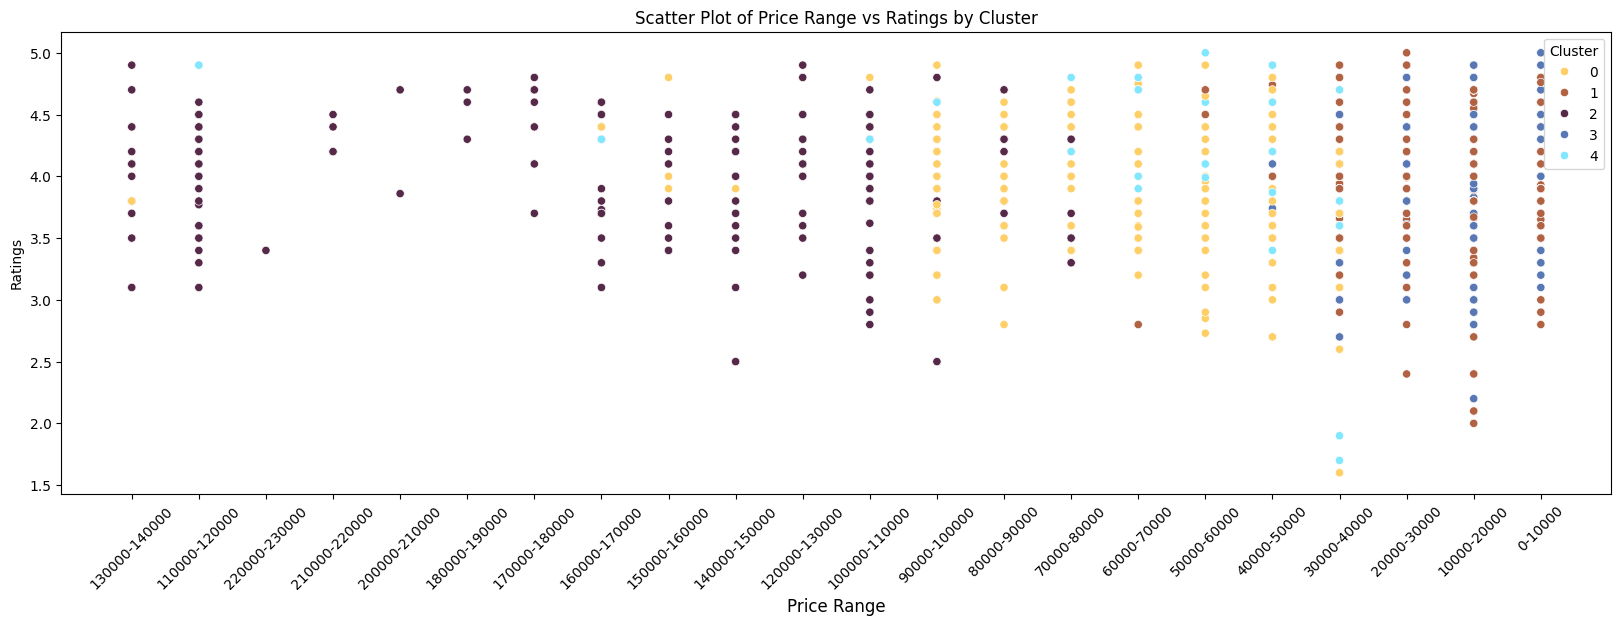

In [56]:
plt.figure(figsize=(20, 6))
sns.scatterplot(data=df, x='Price Range', y='Ratings', hue='Cluster', palette='managua')
plt.title('Scatter Plot of Price Range vs Ratings by Cluster')
plt.xlabel('Price Range', fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Ratings')
plt.legend(title='Cluster')
plt.show()

In [57]:
df['Price Range'].unique()

array(['130000-140000', '110000-120000', '220000-230000', '210000-220000',
       '200000-210000', '180000-190000', '170000-180000', '160000-170000',
       '150000-160000', '140000-150000', '120000-130000', '100000-110000',
       '90000-100000', '80000-90000', '70000-80000', '60000-70000',
       '50000-60000', '40000-50000', '30000-40000', '20000-30000',
       '10000-20000', '0-10000'], dtype=object)

In [58]:
# Calculate the average values of the specified features for each cluster
average_features = df.groupby('Cluster')[features].agg(['mean','median','min','max']).reset_index()
print(average_features)

  Cluster Front Camera (in MP)                Primary Camera (in MP)                      Memory                           RAM                Processor Performance                 
                          mean median min max                   mean median min  max        mean  median  min   max       mean median min max                  mean median  min  max
0       0            32.000000   32.0  32  32             186.479167  200.0  64  200  263.333333   256.0   64   512   9.328125    8.0   4  16              4.665435    5.0  3.0  5.0
1       1            32.000000   32.0  32  32             106.891954  108.0  12  200  105.931034    64.0   32   512   6.029885    6.0   3  12              3.005169    3.0  2.0  5.0
2       2            30.638298   32.0  16  32             182.968085  200.0  50  200  811.574468  1024.0  512  1024  18.382979   16.0   8  24              4.801000    5.0  4.0  5.0
3       3            18.523364   20.0   8  20              62.144860   64.0  12  108   85.08411

In [59]:
from sklearn.neighbors import NearestNeighbors

# Define the subset
subset = df[(df["Cluster"] == 0) & (df["Price Range"] == '130000-140000')]

# Fit the KNN model on the standardized features
knn = NearestNeighbors(n_neighbors=5)  # You can change the number of neighbors
knn.fit(X_scaled)

# Find the indices of the nearest neighbors
indices = knn.kneighbors(scaler.transform(subset[features]), return_distance=False)

# Get the nearest neighbors
nearest_neighbors = df.iloc[indices[0]]
print(nearest_neighbors)

    index    Brand       Mobile Name  Front Camera (in MP)  Primary Camera (in MP)  Memory  RAM  Processor Performance  Battery Power(in mAh)  Screen Height  Screen Width  Ratings      Price Mobile Category    Price Range  Cluster
30     40  Samsung  Galaxy S23 Ultra                    32                     200     512   12                    5.0                 1349.0           2460          1080      4.4  164751.40        Flagship  160000-170000        0
62     98  Samsung        Galaxy S23                    32                     200     512   12                    5.0                 1301.5           2460          1080      3.9  147944.19        Flagship  140000-150000        0
48     76  Samsung  Galaxy S22 Ultra                    32                     200     512   12                    5.0                 1194.0           2460          1080      3.9  153517.04        Flagship  150000-160000        0
43     61  Samsung   Galaxy Z Fold 4                    32                  

In [60]:
# df_unique.to_csv('../data/processed/unique.csv', index=False)

In [61]:
# df.to_csv('../data/processed/statcleaned.csv', index=False)